In [135]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

df = pd.read_csv('PIB_2015.csv', encoding='latin1', sep=",", index_col=False)
colunas = ["vbag", "vbind","vbserv", "vbad", "vbtot"]
df[colunas].head(5)

,vbag,vbind,vbserv,vbad,vbtot
0,146399,20625,98692,132129,397845
1,129644,319625,837823,524422,1811514
2,50772,3274,20864,36399,111308
3,166076,204040,794395,443456,1607968
4,47368,21197,173150,92756,334470


In [104]:
#df.isnull().any()

In [105]:
#(df  == 0).any()

In [106]:
df['vbag'] = df['vbag'].replace(0, df['vbag'].median())
(df  == 0).any()

cod_federacao      False
federacao          False
cod_municipio      False
municipio          False
mesorregiao        False
cod_mesorregiao    False
microrregiao       False
vbag               False
vbind              False
vbserv             False
vbad               False
vbtot              False
imp_liq            False
pib                False
num_hab            False
pib_pcap           False
dtype: bool

In [107]:
df.shape

(5570, 16)

In [109]:
def mapear_serie(serie):
    dict_gen = {}
    serie_aux = []
    serie_aux = serie.unique()
  
    i = 0
    
    for n in serie_aux:
        dict_gen[n] = i
        i = i+1
    
    return dict_gen

dict = mapear_serie(df["federacao"])


In [110]:
df["federacao"].replace(dict, inplace=True)
df.head(10)

,cod_federacao,federacao,cod_municipio,municipio,mesorregiao,cod_mesorregiao,microrregiao,vbag,vbind,vbserv,vbad,vbtot,imp_liq,pib,num_hab,pib_pcap
0,11,0,1100015,Alta Floresta D'Oeste,Leste Rondoniense,11006,Cacoal,146399.0,20625,98692,132129,397845,23197,421042,25578,16461
1,11,0,1100023,Ariquemes,Leste Rondoniense,11003,Ariquemes,129644.0,319625,837823,524422,1811514,214014,2025529,104401,19401
2,11,0,1100031,Cabixi,Leste Rondoniense,11008,Colorado do Oeste,50772.0,3274,20864,36399,111308,5282,116590,6355,18346
3,11,0,1100049,Cacoal,Leste Rondoniense,11006,Cacoal,166076.0,204040,794395,443456,1607968,199811,1807779,87226,20725
4,11,0,1100056,Cerejeiras,Leste Rondoniense,11008,Colorado do Oeste,47368.0,21197,173150,92756,334470,64444,398915,17986,22179
5,11,0,1100064,Colorado do Oeste,Leste Rondoniense,11008,Colorado do Oeste,68898.0,24560,81272,94230,268960,18957,287917,18817,15301
6,11,0,1100072,Corumbiara,Leste Rondoniense,11008,Colorado do Oeste,96280.0,9475,26640,50807,183202,8240,191442,8842,21651
7,11,0,1100080,Costa Marques,Madeira-Guaporé,11002,Guajará-Mirim,59749.0,4481,35790,79867,179888,6958,186846,16651,11221
8,11,0,1100098,Espigão D'Oeste,Leste Rondoniense,11006,Cacoal,101958.0,39860,144655,152951,439424,42169,481593,32385,14871
9,11,0,1100106,Guajará-Mirim,Madeira-Guaporé,11002,Guajará-Mirim,44150.0,24343,288133,233103,589729,96295,686025,46632,14711


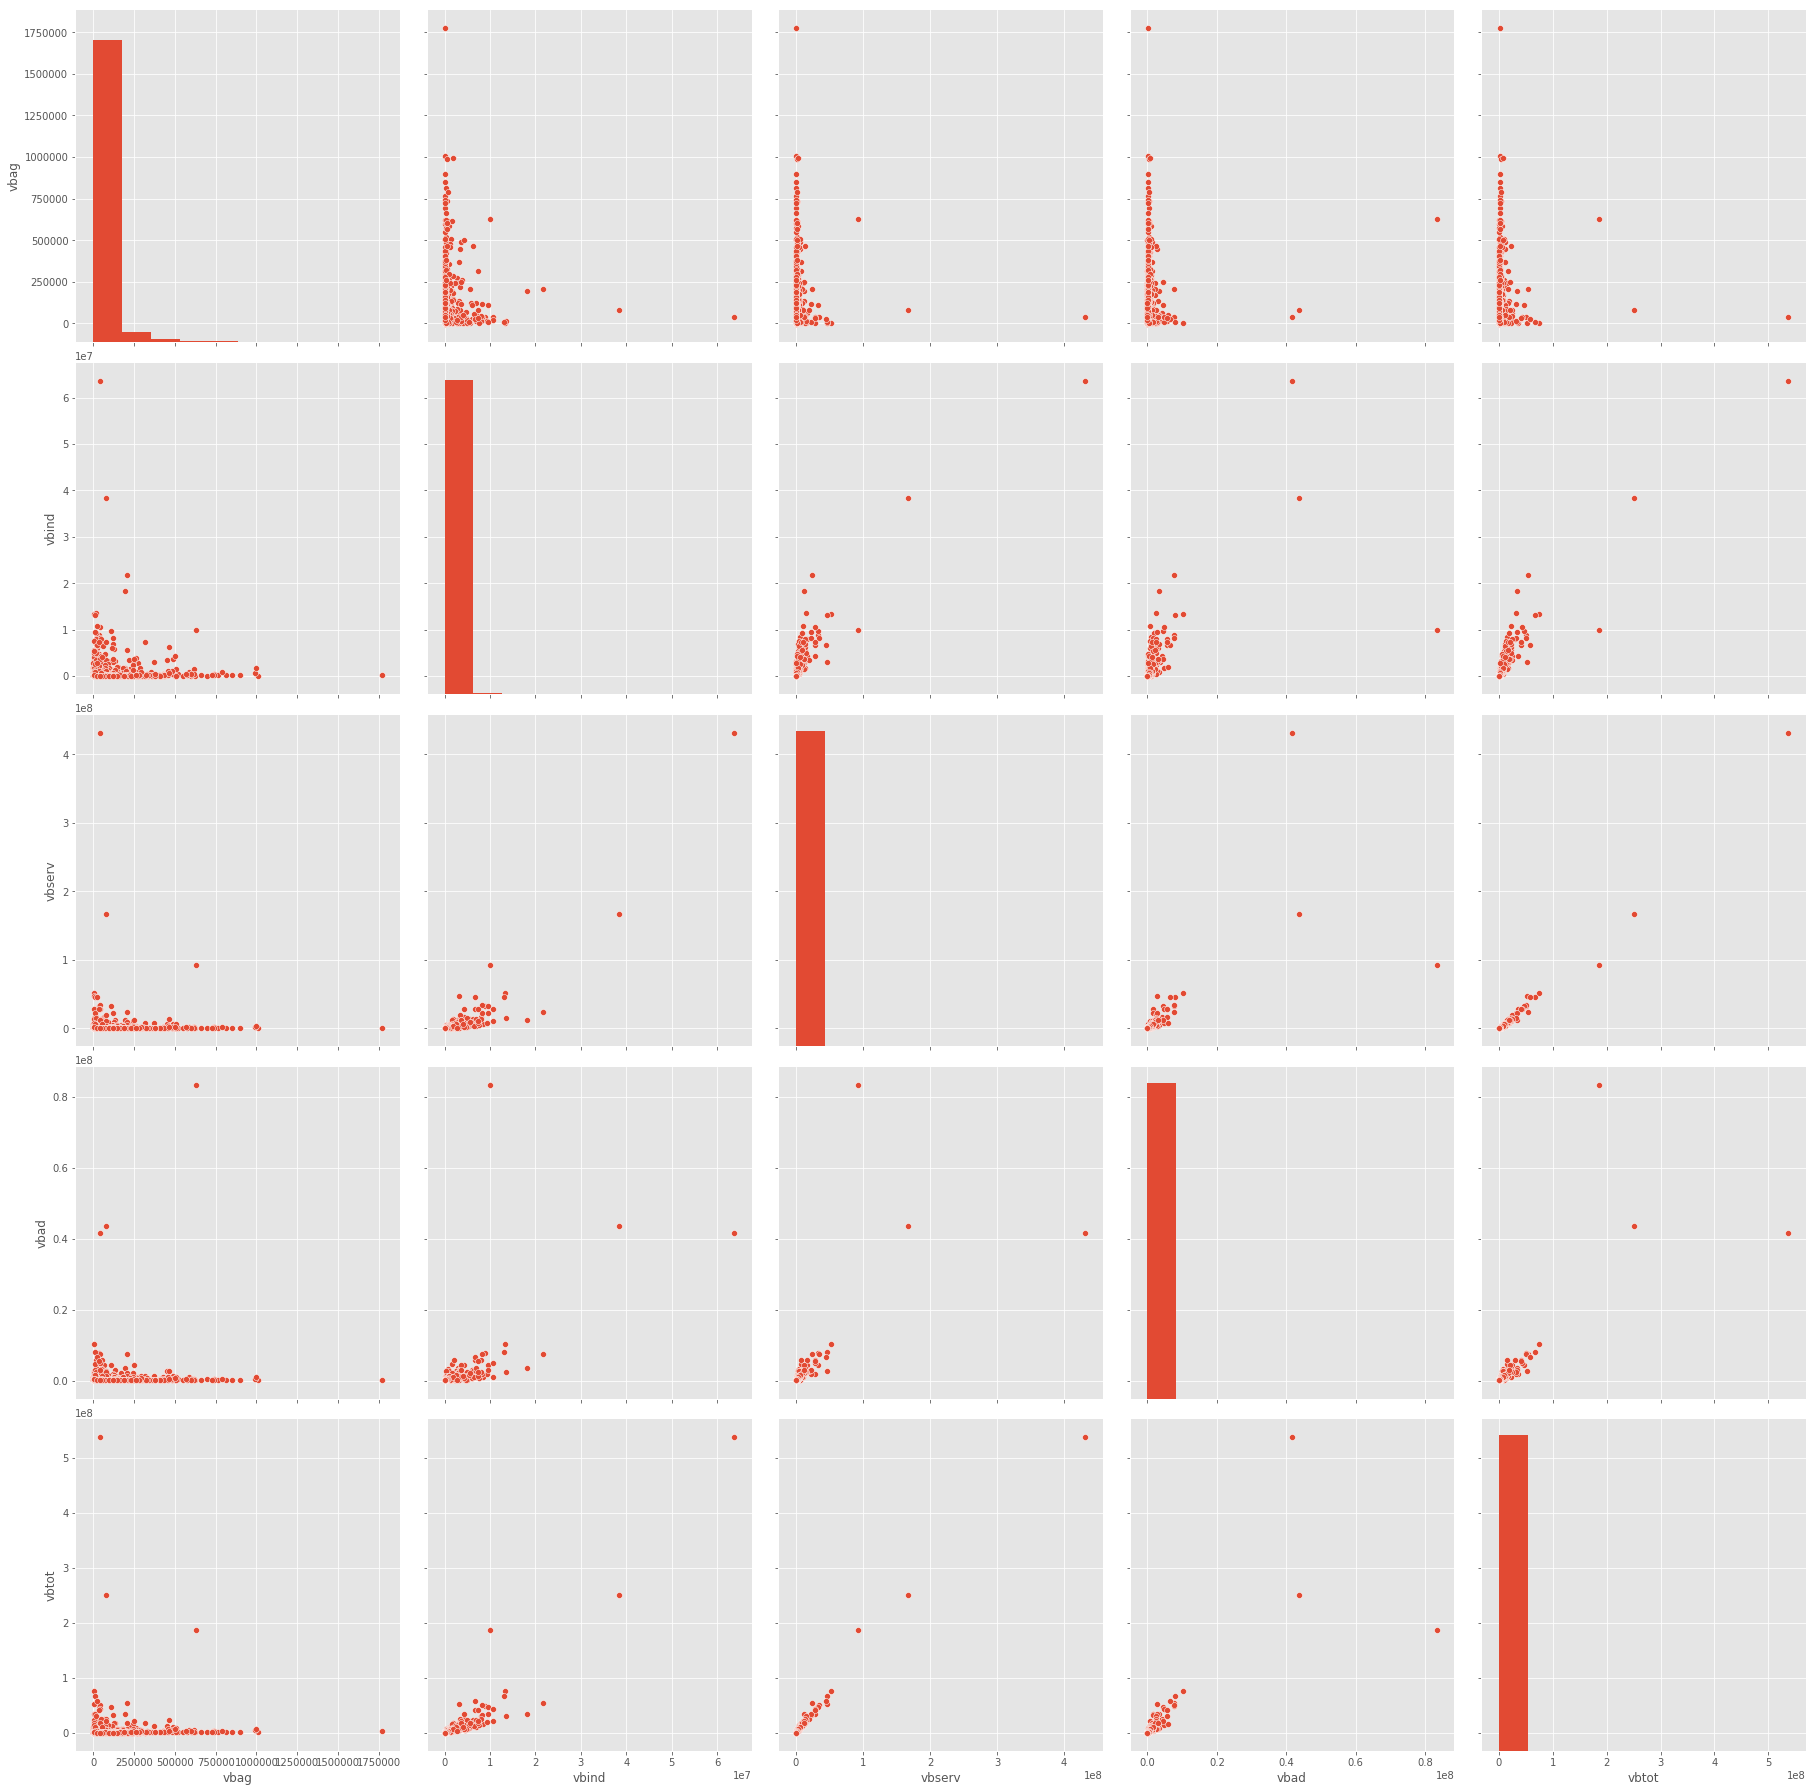

In [166]:
import seaborn as sb
sb.pairplot(df.dropna(), size=5,vars=colunas,kind='scatter')

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
df_train, df_val = train_test_split(df, test_size=0.3,random_state=432)

In [114]:
print(df_train.shape)
print(df_val.shape)

(3899, 16)
(1671, 16)


In [115]:
from sklearn.cluster import KMeans

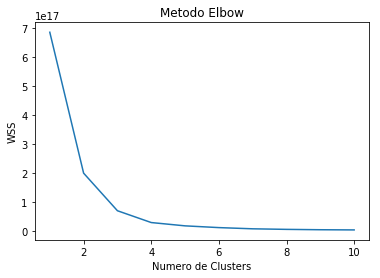

In [116]:
import matplotlib.pyplot as plt

wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=432, n_init=100, init='k-means++')
    kmeans.fit(df_train[colunas])
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [158]:
km = KMeans(n_clusters=4, n_init=100, random_state=432, init='k-means++')

In [159]:
km.fit(df_train[colunas])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=432, tol=0.0001, verbose=0)

In [160]:
labels = km.predict(df_train[colunas])
print(labels)

[3 3 3 ... 3 3 3]


In [161]:
centers = km.cluster_centers_
print(centers)

[[7.00555517e+04 7.37772700e+06 2.02654653e+07 3.63750290e+06
  3.13507509e+07]
 [4.09820000e+04 6.36651380e+07 4.31465442e+08 4.15508740e+07
  5.36722436e+08]
 [3.52187000e+05 2.42364700e+07 1.29990052e+08 6.34975855e+07
  2.18076294e+08]
 [4.66090062e+04 1.36997713e+05 2.44111783e+05 1.02301808e+05
  5.30008295e+05]]


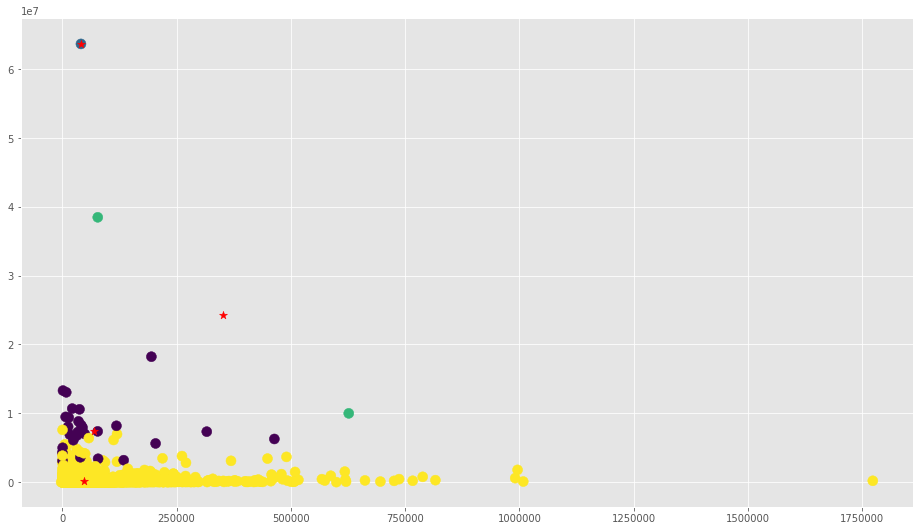

In [165]:
f1 = df_train['vbag'].values
f2 = df_train['vbind'].values

plt.scatter(f1, f2, c=labels, s=100)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c="red", s=70)
plt.show()

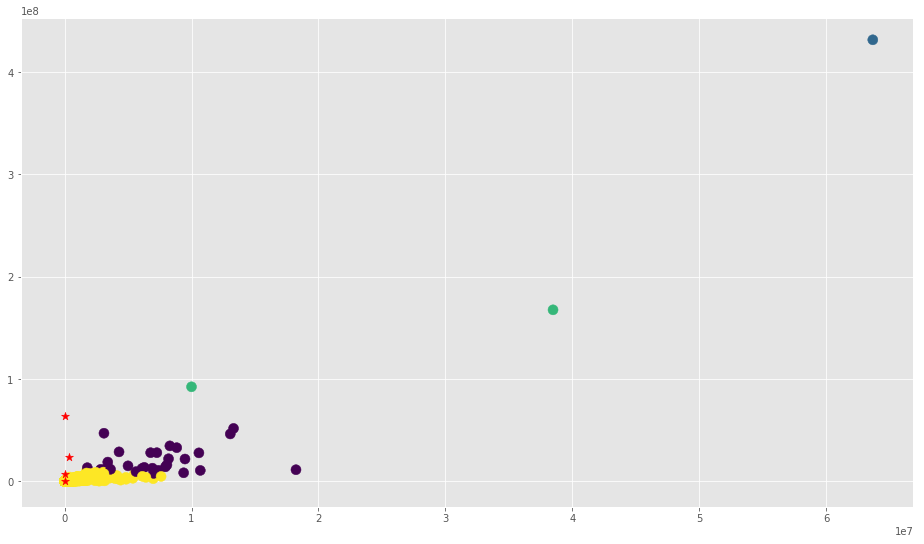

In [164]:
f1 = df_train['vbind'].values
f2 = df_train['vbserv'].values

plt.scatter(f1, f2, c=labels, s=100)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c="red", s=70)
plt.show()